In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
num_nans_keyword = train_data['keyword'].isna().sum()
print(f'Number of NaNs in column keyword: {num_nans_keyword}')

num_nans_location = train_data['location'].isna().sum()
print(f'Number of NaNs in column location: {num_nans_location}')

train_data['keyword'] = train_data['keyword'].fillna('-')
train_data['location'] = train_data['location'].fillna('-')
test_data['keyword'] = train_data['keyword'].fillna('-')
test_data['location'] = train_data['location'].fillna('-')


Number of NaNs in column keyword: 61
Number of NaNs in column location: 2533


                  word  count
163               like    345
75                  im    306
400                amp    300
14                fire    252
287                get    229
...                ...    ...
9906             intel      1
9907   httptcojnsdrwbp      1
9908              hhbu      1
9909             mello      1
21490  httptcoymyrskqd      1

[21365 rows x 2 columns]


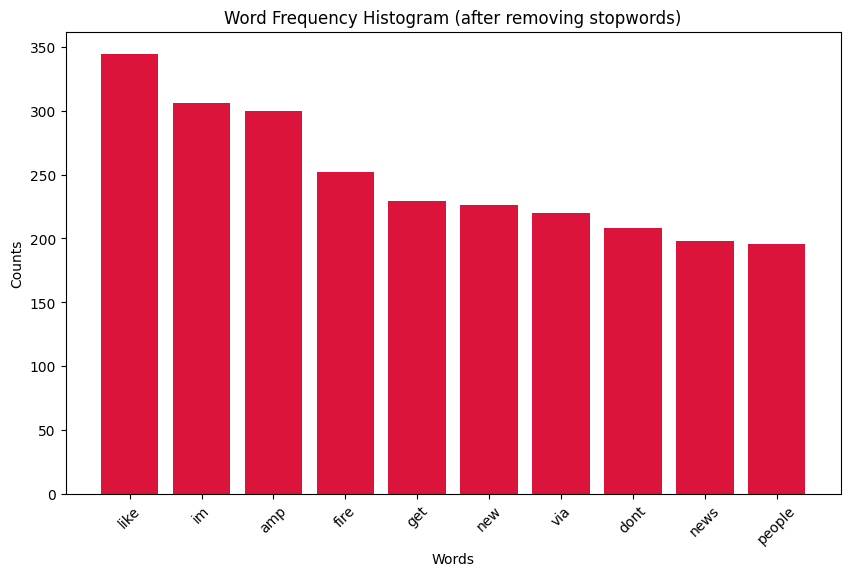

In [5]:
from collections import Counter
import re
counts = Counter()

for text in train_data['text']:
    w = re.sub(r'[^a-zA-Z\s]', '', text).lower().split() 
    counts.update(w)

word_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['count']).reset_index()
word_counts = word_counts.rename(columns={'index': 'word'}).sort_values(by='count', ascending=False)

stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most","m", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","-"]

filtered_word_counts = word_counts[~word_counts['word'].isin(stop_words)]

print(filtered_word_counts)

# Histogram for Top 10 word counts after filtering stop words
plt.figure(figsize=(10, 6))
plt.bar(filtered_word_counts['word'][:10], filtered_word_counts['count'][:10], color='crimson')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Word Frequency Histogram (after removing stopwords)')
plt.xticks(rotation=45)  
plt.show()


In [6]:
def plot_accuracy(history):
   
    # Extract accuracy and validation accuracy from the history object
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Define the number of epochs
    epochs = range(1, len(train_acc) + 1)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

## Cleaning the text column

Preprocessing text by removing mentions, hashtags, URLs, and punctuation, converting the text to lowercase, and filtering out stop words and non-alphabetic tokens and then applying the clean function to both train and test set so that it becomes easier to train the model.

In [7]:
import nltk
from nltk.tokenize import word_tokenize
import string


def clean(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'http\w+|www\w+|https\w+', '', text)
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words and word.isalpha()]
    
    return ' '.join(words)


train_data['processed_text'] = train_data['text'].apply(clean)
test_data['processed_text'] = test_data['text'].apply(clean)

print(train_data.head())

max_text_length = train_data['processed_text'].apply(lambda x: len(x.split())).max()

   id keyword location                                               text  \
0   1       -        -  Our Deeds are the Reason of this #earthquake M...   
1   4       -        -             Forest fire near La Ronge Sask. Canada   
2   5       -        -  All residents asked to 'shelter in place' are ...   
3   6       -        -  13,000 people receive #wildfires evacuation or...   
4   7       -        -  Just got sent this photo from Ruby #Alaska as ...   

   target                                     processed_text  
0       1                  deeds reason may allah forgive us  
1       1              forest fire near la ronge sask canada  
2       1  residents asked shelter place notified officer...  
3       1        people receive evacuation orders california  
4       1             got sent photo ruby smoke pours school  


#### Tokenizer is used to convert a collection of text documents into numerical tokens, which are then used as input for machine learning models, particularly in NLP tasks. Here, it is used to convert text data into sequences of integers, limiting the vocabulary size. After fitting the tokenizer on the processed text data, the text was transformed into sequences and padded them to ensure uniform sequence length across the dataset. This ensures that all sequences have the same length, which is necessary for batch processing in deep learning models

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab_size = 5000

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['processed_text'])

sequences = tokenizer.texts_to_sequences(train_data['processed_text'])

# Pad sequences to ensure they are of the same length
train_padded_sequences = pad_sequences(sequences, maxlen=max_text_length, padding='post', truncating='post')


2024-08-08 22:23:26.353644: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 22:23:26.353788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 22:23:26.513038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Model1

This architecture takes text input, converts it into dense vectors using an embedding layer, processes it through a recurrent neural network (SimpleRNN), applies dropout for regularization, and outputs a probability score for binary classification using a dense layer with a sigmoid activation function.

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout

y_train = train_data['target'].values

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_text_length),
    SimpleRNN(units=64, return_sequences=False),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(train_padded_sequences, y_train, epochs=7, batch_size=32, validation_split=0.25)

Epoch 1/7


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


179/179 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6201 - loss: 0.6487 - val_accuracy: 0.7206 - val_loss: 0.5848
Epoch 2/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8418 - loss: 0.3888 - val_accuracy: 0.7153 - val_loss: 0.5911
Epoch 3/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9113 - loss: 0.2465 - val_accuracy: 0.7027 - val_loss: 0.6677
Epoch 4/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9392 - loss: 0.1825 - val_accuracy: 0.6418 - val_loss: 0.7999
Epoch 5/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9537 - loss: 0.1446 - val_accuracy: 0.7006 - val_loss: 0.6948
Epoch 6/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9601 - loss: 0.1325 - val_accuracy: 0.6345 - val_loss: 0.8570
Epoch 7/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9632 - loss: 0.1222 - val_accuracy: 0.6607 - val_loss: 0.8531


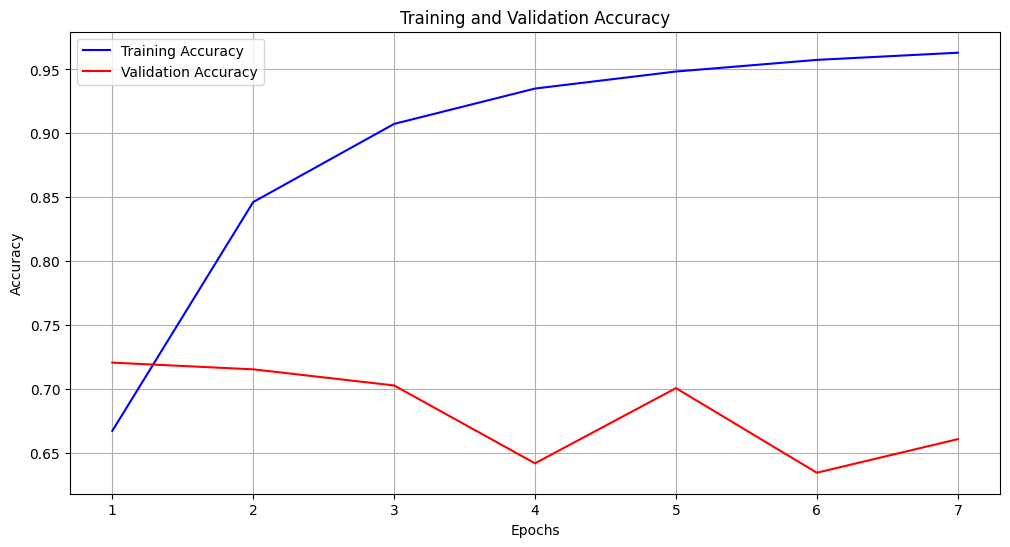

In [10]:
plot_accuracy(history)

As we can see here, validation accuracy keeps decreasing and validation loss keeps increasing after each epoch. It is struggling to generalize well to the validation data. The model is likely overfitting to the training data. This means it is learning very specific patterns in the training set that do not generalize well to unseen data 

## Model 2

Model2 is an enhanced version of Model1 with several modifications aimed at improving performance and reducing overfitting:

Two RNN Layers: It includes two SimpleRNN layers— the first with return_sequences=True to pass the entire sequence to the next RNN layer, and the second with units=128 for increased capacity.
Regularization: Added L2 regularization (kernel_regularizer=l2(0.01)) to both RNN layers to penalize large weights and help prevent overfitting.
Batch Normalization: Introduced a BatchNormalization layer to normalize activations and improve training stability.
Dropout: Maintains dropout with a rate of 0.5 after each RNN layer to further reduce overfitting

In [11]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

model2 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_text_length),
    SimpleRNN(units=64, return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(), 
    SimpleRNN(units=128, kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])


model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model2.fit(train_padded_sequences, y_train, epochs=7, batch_size=32, validation_split=0.25)

Epoch 1/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5527 - loss: 2.3213 - val_accuracy: 0.6943 - val_loss: 1.5644
Epoch 2/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7920 - loss: 1.3353 - val_accuracy: 0.7101 - val_loss: 1.1428
Epoch 3/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8784 - loss: 0.7717 - val_accuracy: 0.7153 - val_loss: 1.0133
Epoch 4/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9318 - loss: 0.4516 - val_accuracy: 0.6618 - val_loss: 1.0128
Epoch 5/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9424 - loss: 0.3179 - val_accuracy: 0.7017 - val_loss: 0.9228
Epoch 6/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9511 - loss: 0.2224 - val_accuracy: 0.6770 - val_loss: 0.9580
Epoch 7/7
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9637 - loss: 0.1700 - val_accuracy: 0.6423 - val_loss: 1.1027


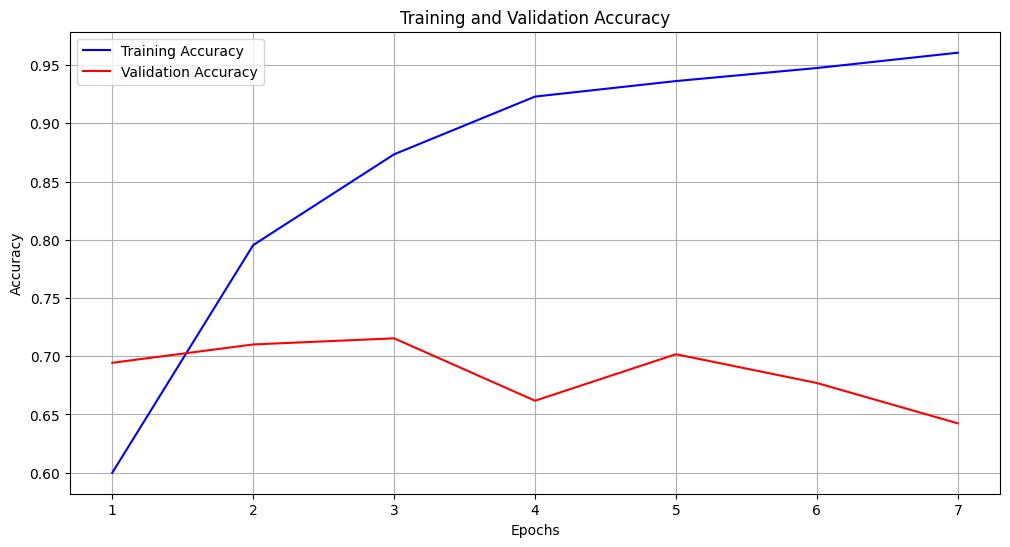

In [12]:
plot_accuracy(history)

## Hyperparameter tuning

In [53]:
def build_model(rnn_units, dropout_rate, learning_rate):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_text_length),
        SimpleRNN(units=rnn_units, return_sequences=True, kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        BatchNormalization(), 
        SimpleRNN(units=rnn_units, kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid') 
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [56]:
hyperparameters = [
    {'rnn_units': 64, 'dropout_rate': 0.3},
    {'rnn_units': 128, 'dropout_rate': 0.5},
    {'rnn_units': 256, 'dropout_rate': 0.7},
    {'rnn_units': 64, 'dropout_rate': 0.5},
    {'rnn_units': 128, 'dropout_rate': 0.3},
    {'rnn_units': 256, 'dropout_rate': 0.5}
]

best_accuracy = 0
best_params = None

# Testing each set of hyperparameters
for params in hyperparameters:
    print(f"Testing hyperparameters: {params}")
    model = build_model(params['rnn_units'], params['dropout_rate'], 0.0001)
    history = model.fit(train_padded_sequences, y_train, epochs=5, batch_size=32, validation_split=0.25)
    
    val_accuracy = max(history.history['val_accuracy'])
    print(f"Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params

print(f"Best Validation Accuracy: {best_accuracy} with hyperparameters: {best_params}")

Testing hyperparameters: {'rnn_units': 64, 'dropout_rate': 0.3}
Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5518 - loss: 2.2063 - val_accuracy: 0.5657 - val_loss: 2.0792
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6055 - loss: 2.0556 - val_accuracy: 0.6339 - val_loss: 1.9676
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7019 - loss: 1.8678 - val_accuracy: 0.6618 - val_loss: 1.8926
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8215 - loss: 1.6348 - val_accuracy: 0.6539 - val_loss: 1.8856
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8922 - loss: 1.4437 - val_accuracy: 0.6833 - val_loss: 1.8696
Validation Accuracy: 0.6832982897758484
Testing hyperparameters: {'rnn_units': 128, 'dropout_rate': 0.5}
Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5492 - loss: 3.3888 - val_accuracy: 0.5851 - val_loss: 3.1197
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6113 - loss: 3.1466 - val_accuracy: 0.6329 - val_loss: 2.9976
Epoch 3

## Model3

Model3 incorporates several advanced features:

Bidirectional GRU Layers: Uses two Bidirectional layers with GRU units to capture dependencies from both directions in the text sequences, improving context understanding.
Regularization: Applies L2 regularization to the GRU layers to combat overfitting.
Dropout: Includes dropout with a rate of 0.5 after each GRU layer to further reduce overfitting.
Optimizer: Utilizes the Adam optimizer with a learning rate of 0.0001 to manage the model’s weight updates during training.

In [13]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model3 = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_text_length),
    Bidirectional(GRU(units=128, return_sequences=True, kernel_regularizer=l2(0.01))),
    Dropout(0.5),
    Bidirectional(GRU(units=128, kernel_regularizer=l2(0.01))),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Adam(learning_rate=0.0001)
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model3.fit(train_padded_sequences, y_train, epochs=7, batch_size=32, validation_split=0.2)

Epoch 1/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.5745 - loss: 9.4073 - val_accuracy: 0.5345 - val_loss: 6.2745
Epoch 2/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.5829 - loss: 5.5198 - val_accuracy: 0.5351 - val_loss: 3.7028
Epoch 3/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.6658 - loss: 3.2265 - val_accuracy: 0.7669 - val_loss: 2.1031
Epoch 4/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.8474 - loss: 1.7384 - val_accuracy: 0.7643 - val_loss: 1.3051
Epoch 5/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.8737 - loss: 1.0118 - val_accuracy: 0.7531 - val_loss: 0.9529
Epoch 6/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.8941 - loss: 0.6242 - val_accuracy: 0.7433 - val_loss: 0.7855
Epoch 7/7
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9074 - loss: 0.4190 - val_accuracy: 0.7315 - val_loss: 0.7965


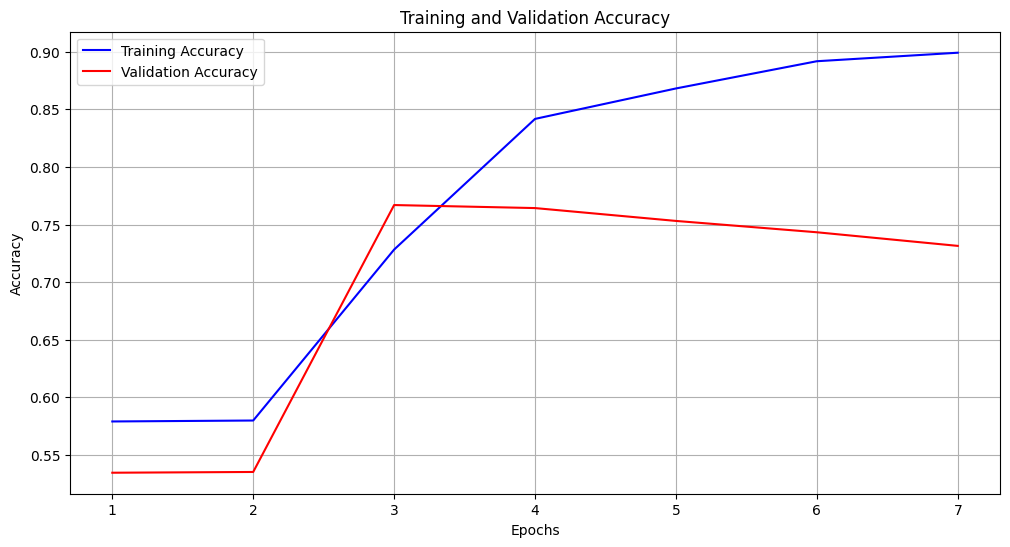

In [14]:
plot_accuracy(history)

In [60]:
test_sequences = tokenizer.texts_to_sequences(test_data['processed_text'])
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_text_length, padding='post', truncating='post')

predictions = model3.predict(padded_test_sequences)

# Convert predictions to binary (0 or 1)
predictions = (predictions > 0.5).astype(int)


result = pd.DataFrame()
result['id'] = test_data['id'].copy()
result['target'] = predictions


result.to_csv('submission.csv', index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


In conclusion, Model1 is the simplest with a single RNN layer and basic dropout, suitable for initial tests but prone to overfitting.
Model2 introduces complexity with two RNN layers, batch normalization, and regularization, aiming to improve performance and generalization.
Model3 is the most advanced, using bidirectional GRU layers and an Adam optimizer to capture richer text context and enhance performance, while being computationally more intensive. 

### Future improvements
Implementing early stopping to monitor validation performance and stop training when performance ceases to improve.
Experimenting with additional layers (e.g., more GRU or LSTM layers) to capture more complex patterns in the data.
Using learning rate schedulers or techniques like learning rate annealing to adaptively adjust the learning rate during training.